# House Price Prediction 

## Importing and Understanding Data

In [1]:
import numpy as np
import pandas as pd                                  #To work with dataset
import matplotlib.pyplot as plt                      #Data Visualization Libraries
import seaborn as sns                                #Data Visualization Libraries
from sklearn.model_selection import train_test_split #To split dataset into train $ test
from sklearn.preprocessing import MinMaxScaler       #To scale features
from sklearn.feature_selection import RFE            #Use RFE to select features
from sklearn import linear_model                     #To build model
from sklearn.linear_model import LinearRegression    #To build model
import statsmodels.api as sm                         #To build model
from statsmodels.stats.outliers_influence import variance_inflation_factor  #Calculate VIF
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge, Lasso 
from sklearn.model_selection import GridSearchCV

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import day.csv file using pandas
df=pd.read_csv('train.csv')

In [4]:
# Check first 5 records in dataset
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Check number of rows and columns
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())

Rows     :  1460
Columns  :  81

Features : 
 ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3

In [6]:
# Getting insights of the features
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# Summary of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
#Find percentage of null values in each column
100 * df.isnull().mean()

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [9]:
#Find columns having missing values greater than 70%, these NA values needs to be imputed as given in data dictionary
for i in df.columns:
    if (100 * df[i].isnull().mean()) > 70:
        print(i)

Alley
PoolQC
Fence
MiscFeature


### Understanding data dictionary

In [10]:
# Replacing the numeric values with string values. This is necessary because numeric values provide order which is not applicable here  

def str_map(x):
    return x.map({20:'1-STORY 1946 & NEWER', 30:'1-STORY 1945 & OLDER', 40:'1-STORY W/FINISHED ATTIC', 45:'1-1/2 STORY UNFINISHED', 50:'1-1/2 STORY FINISHED', 60:'2-STORY 1946 & NEWER', 70:'2-STORY 1945 & OLDER', 75:'2-1/2 STORY', 80:'SPLIT OR MULTI-LEVEL', 85:'SPLIT FOYER', 90:'DUPLEX', 120:'1-STORY PUD', 150:'1-1/2 STORY PUD', 160:'2-STORY PUD', 180:'PUD - MULTILEVEL', 190:'2 FAMILY CONVERSION'})

df[['MSSubClass']]=df[['MSSubClass']].apply(str_map)

In [11]:
# confirm the values are converted
df[['MSSubClass']].value_counts()

MSSubClass              
1-STORY 1946 & NEWER        536
2-STORY 1946 & NEWER        299
1-1/2 STORY FINISHED        144
1-STORY PUD                  87
1-STORY 1945 & OLDER         69
2-STORY PUD                  63
2-STORY 1945 & OLDER         60
SPLIT OR MULTI-LEVEL         58
DUPLEX                       52
2 FAMILY CONVERSION          30
SPLIT FOYER                  20
2-1/2 STORY                  16
1-1/2 STORY UNFINISHED       12
PUD - MULTILEVEL             10
1-STORY W/FINISHED ATTIC      4
dtype: int64

In [12]:
# Replacing the numeric values with string values. This is necessary because numeric values provide order which is not applicable here  

def str_map(x):
    return x.map({10:'Qual_VExcellant', 9:'Qual_Excellant', 8:'Qual_VGood', 7:'Qual_Good', 6:'Qual_AboveAvg', 5:'Qual_Avg', 4:'Qual_BelowAvg', 3:'Qual_Fair', 2:'Qual_Poor', 1:'Qual_VPoor'})

df[['OverallQual']]=df[['OverallQual']].apply(str_map)

In [13]:
# confirm the values are converted
df[['OverallQual']].value_counts()

OverallQual    
Qual_Avg           397
Qual_AboveAvg      374
Qual_Good          319
Qual_VGood         168
Qual_BelowAvg      116
Qual_Excellant      43
Qual_Fair           20
Qual_VExcellant     18
Qual_Poor            3
Qual_VPoor           2
dtype: int64

In [14]:
# Replacing the numeric values with string values. This is necessary because numeric values provide order which is not applicable here  

def str_map(x):
    return x.map({10:'Cond_VExcellant', 9:'Cond_Excellant', 8:'Cond_VGood', 7:'Cond_Good', 6:'Cond_AboveAvg', 5:'Cond_Avg', 4:'Cond_BelowAvg', 3:'Cond_Fair', 2:'Cond_Poor', 1:'Cond_VPoor'})

df[['OverallCond']]=df[['OverallCond']].apply(str_map)

In [15]:
# confirm the values are converted
df[['OverallCond']].value_counts()

OverallCond   
Cond_Avg          821
Cond_AboveAvg     252
Cond_Good         205
Cond_VGood         72
Cond_BelowAvg      57
Cond_Fair          25
Cond_Excellant     22
Cond_Poor           5
Cond_VPoor          1
dtype: int64

In [16]:
# fix incorrect datatype
df['MSSubClass'] = df['MSSubClass'].astype('object')
df['OverallQual'] = df['OverallQual'].astype('object')
df['OverallCond'] = df['OverallCond'].astype('object')
df['BsmtFullBath'] = df['BsmtFullBath'].astype('object')
df['BsmtHalfBath'] = df['BsmtHalfBath'].astype('object')
df['FullBath'] = df['FullBath'].astype('object')
df['HalfBath'] = df['HalfBath'].astype('object')
df['BedroomAbvGr'] = df['BedroomAbvGr'].astype('object')
df['KitchenAbvGr'] = df['KitchenAbvGr'].astype('object')
df['TotRmsAbvGrd'] = df['TotRmsAbvGrd'].astype('object')
df['Fireplaces'] = df['Fireplaces'].astype('object')
df['GarageCars'] = df['GarageCars'].astype('object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

In [18]:
# Check count of unique values in each column
for i in df.columns:
    print(i,df[i].nunique())

Id 1460
MSSubClass 15
MSZoning 5
LotFrontage 110
LotArea 1073
Street 2
Alley 2
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
OverallQual 10
OverallCond 9
YearBuilt 112
YearRemodAdd 61
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 4
MasVnrArea 327
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 4
BsmtCond 4
BsmtExposure 4
BsmtFinType1 6
BsmtFinSF1 637
BsmtFinType2 6
BsmtFinSF2 144
BsmtUnfSF 780
TotalBsmtSF 721
Heating 6
HeatingQC 5
CentralAir 2
Electrical 5
1stFlrSF 753
2ndFlrSF 417
LowQualFinSF 24
GrLivArea 861
BsmtFullBath 4
BsmtHalfBath 3
FullBath 4
HalfBath 3
BedroomAbvGr 8
KitchenAbvGr 4
KitchenQual 4
TotRmsAbvGrd 12
Functional 7
Fireplaces 4
FireplaceQu 5
GarageType 6
GarageYrBlt 97
GarageFinish 3
GarageCars 5
GarageArea 441
GarageQual 5
GarageCond 5
PavedDrive 3
WoodDeckSF 274
OpenPorchSF 202
EnclosedPorch 120
3SsnPorch 20
ScreenPorch 76
PoolArea 8
PoolQC 3
Fence 4
MiscFeature 4
MiscV

### Column Segmentation

In [19]:
# Split variables into continuous and categorical variables, so that it will become easy to analyse. 

cont_cols=["LotFrontage","LotArea","YearBuilt","YearRemodAdd","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","GrLivArea","GarageYrBlt","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","MiscVal","MoSold","SalePrice","LowQualFinSF","PoolArea","YrSold"] 
cat_cols=["MSSubClass","MSZoning","Street","Alley","LotShape","LandContour","Utilities","LotConfig","LandSlope","Neighborhood","Condition1","Condition2","BldgType","HouseStyle","OverallQual","OverallCond","RoofStyle","RoofMatl","Exterior1st","Exterior2nd","MasVnrType","ExterQual","ExterCond","Foundation","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","Heating","HeatingQC","CentralAir","Electrical","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","KitchenQual","TotRmsAbvGrd","Functional","Fireplaces","FireplaceQu","GarageType","GarageFinish","GarageQual","GarageCond","GarageCars","PavedDrive","PoolQC","Fence","MiscFeature","SaleType","SaleCondition"]


In [20]:
for i in cat_cols:
    print(df[i].value_counts())

1-STORY 1946 & NEWER        536
2-STORY 1946 & NEWER        299
1-1/2 STORY FINISHED        144
1-STORY PUD                  87
1-STORY 1945 & OLDER         69
2-STORY PUD                  63
2-STORY 1945 & OLDER         60
SPLIT OR MULTI-LEVEL         58
DUPLEX                       52
2 FAMILY CONVERSION          30
SPLIT FOYER                  20
2-1/2 STORY                  16
1-1/2 STORY UNFINISHED       12
PUD - MULTILEVEL             10
1-STORY W/FINISHED ATTIC      4
Name: MSSubClass, dtype: int64
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Grvl    50
Pave    41
Name: Alley, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR

## Data Visualization

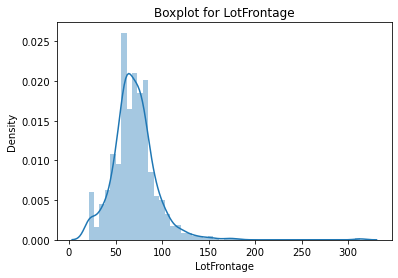

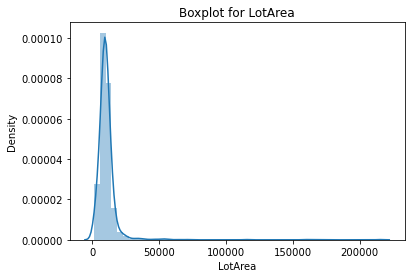

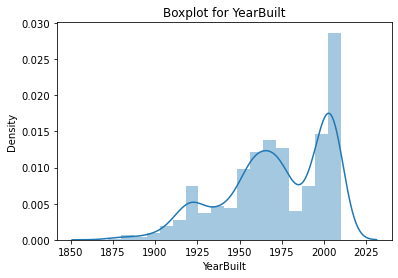

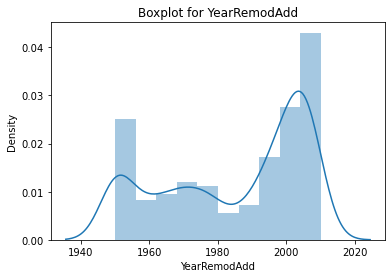

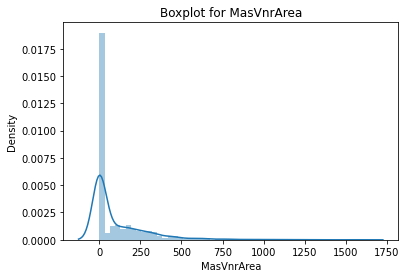

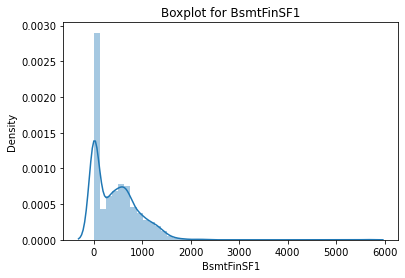

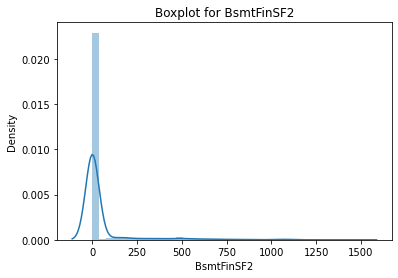

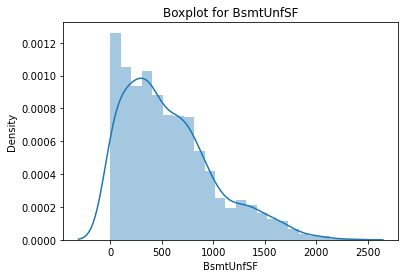

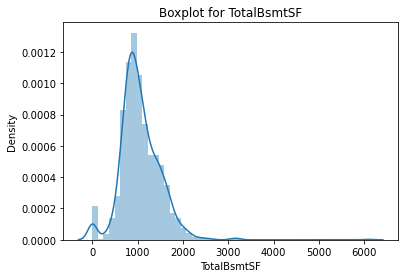

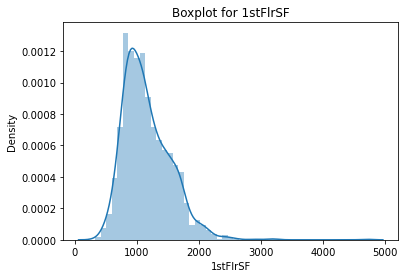

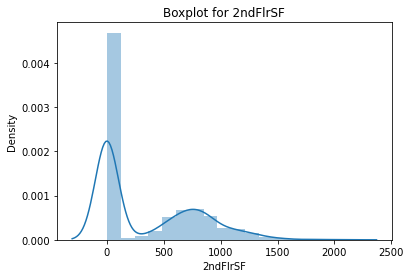

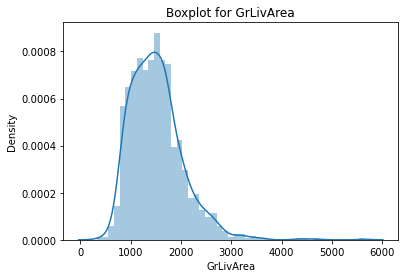

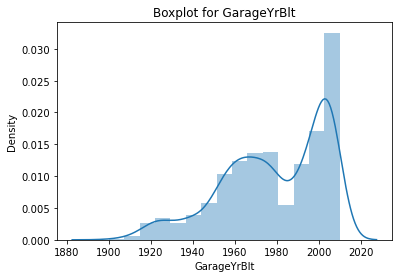

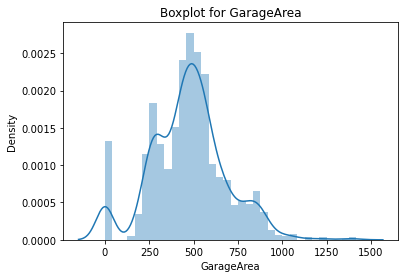

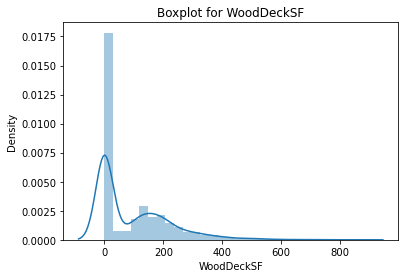

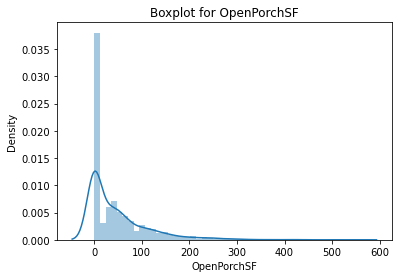

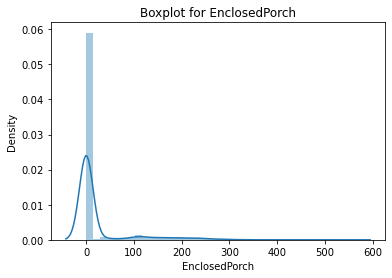

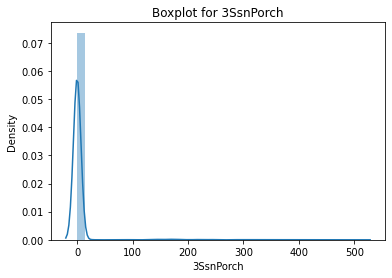

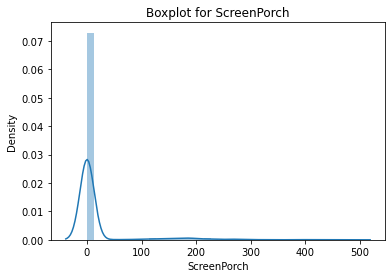

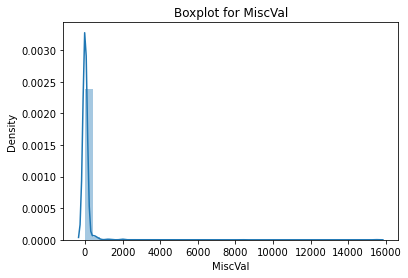

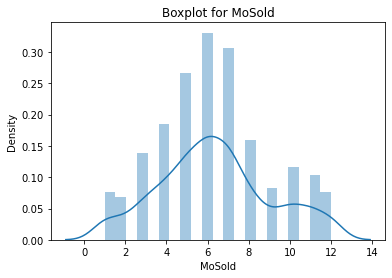

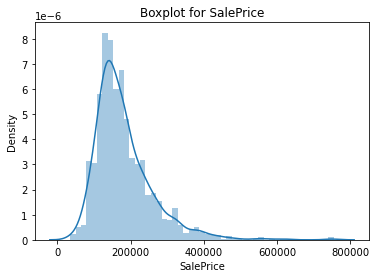

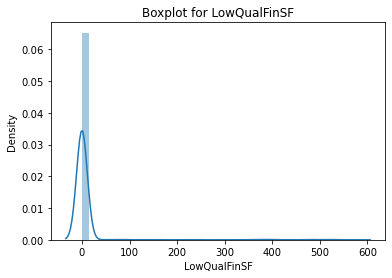

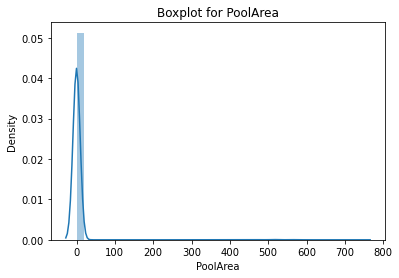

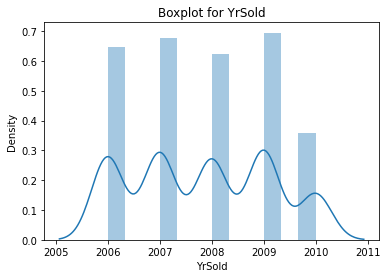

In [21]:
# Plot continuous variables using distplot
for i in cont_cols:
    sns.distplot(df[i])
    plt.title("Boxplot for "+i)
   
    plt.show()

### Insights -
1. Many of the variables are normally distributed with mean 0
2. Sales increases till middle of year & starts decreasing
1. Saleprice is same across all year given

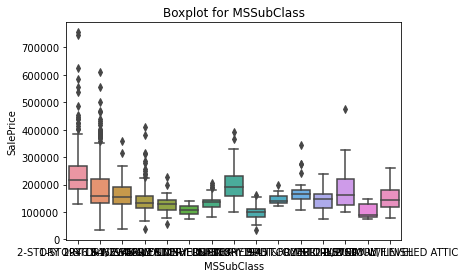

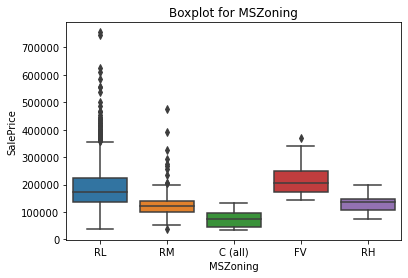

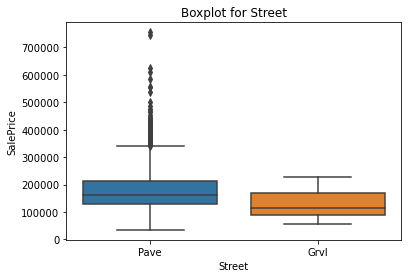

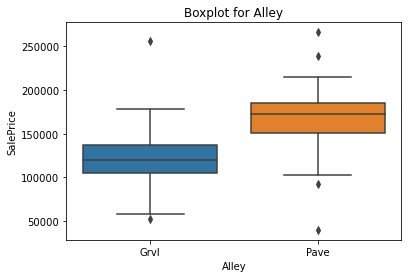

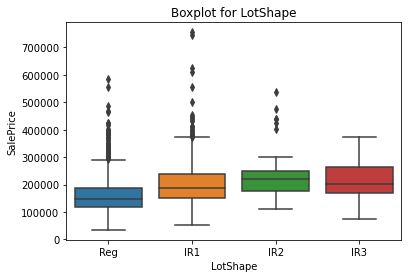

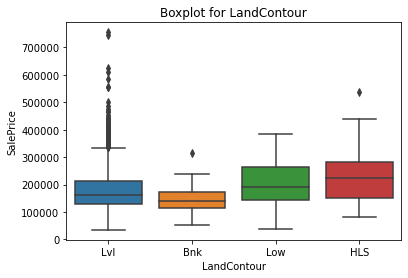

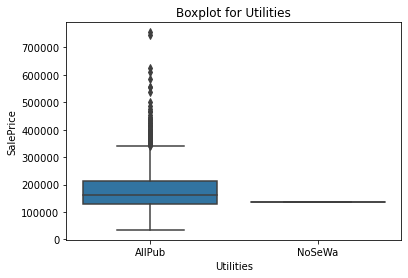

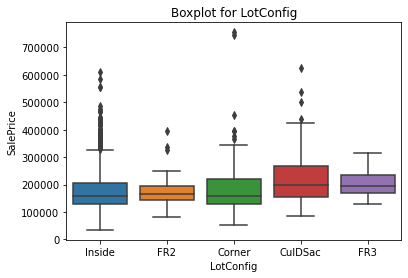

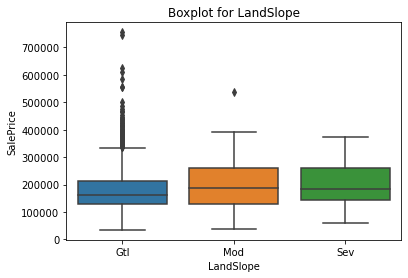

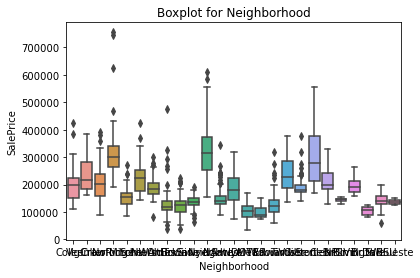

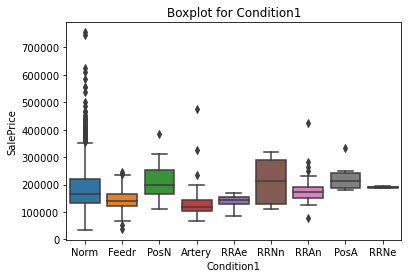

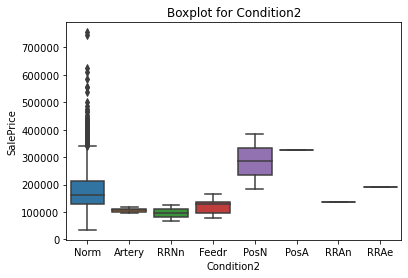

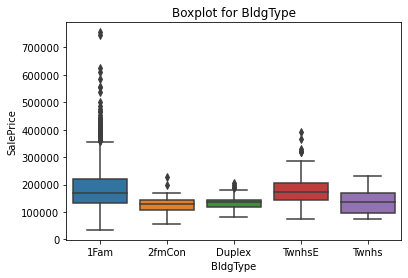

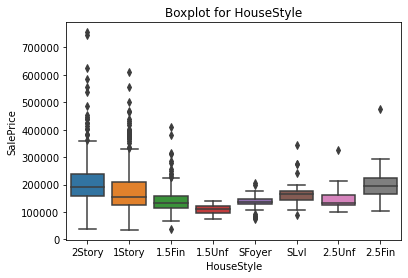

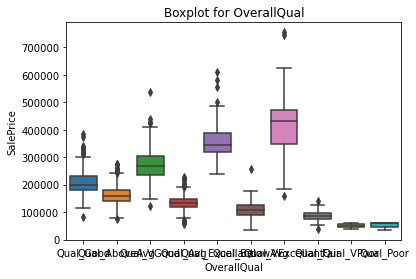

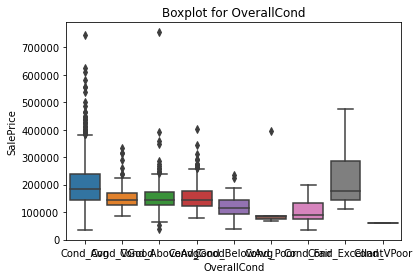

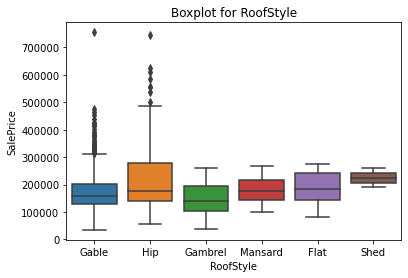

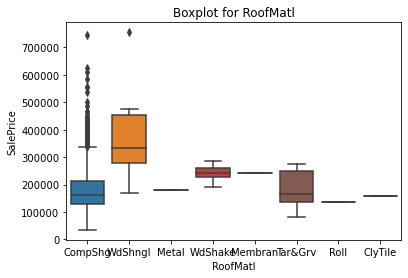

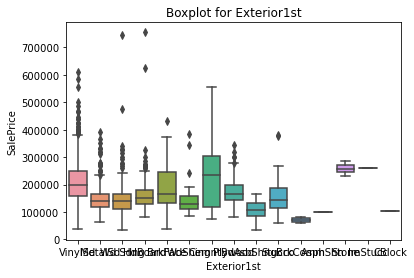

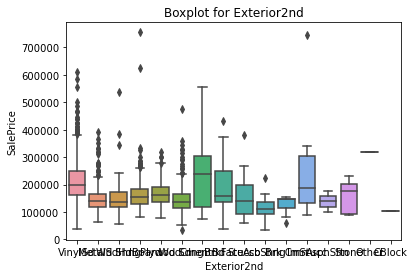

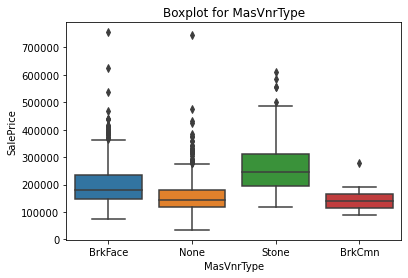

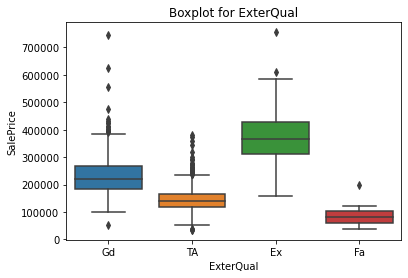

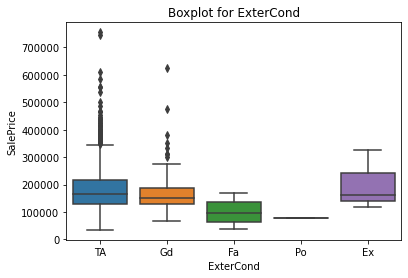

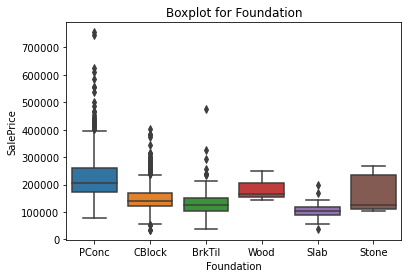

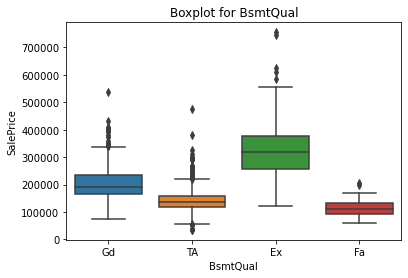

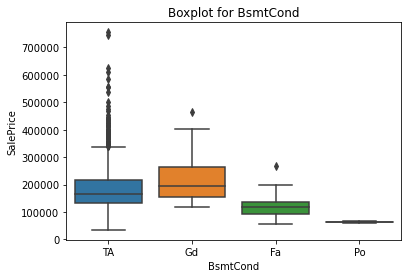

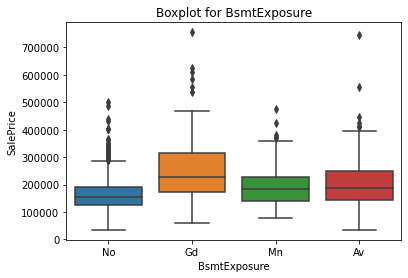

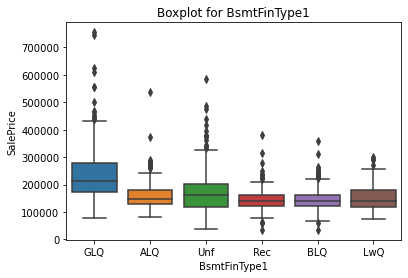

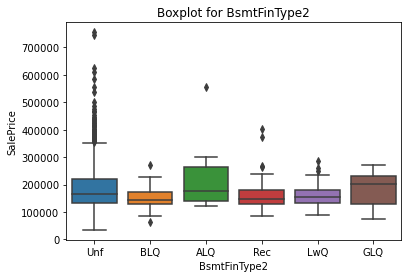

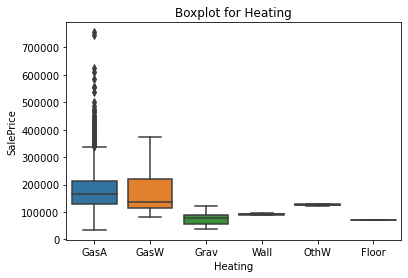

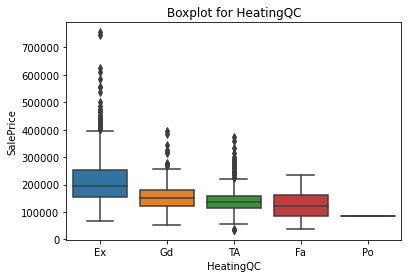

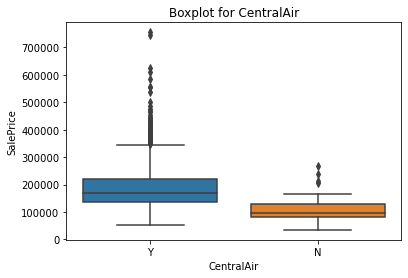

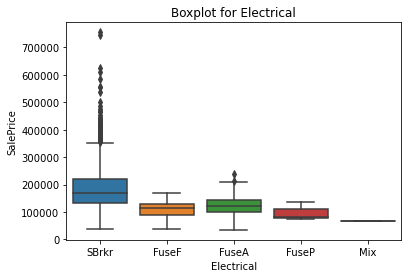

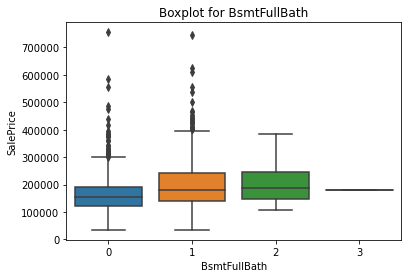

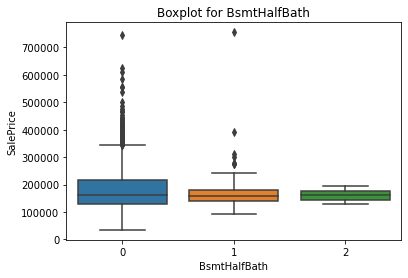

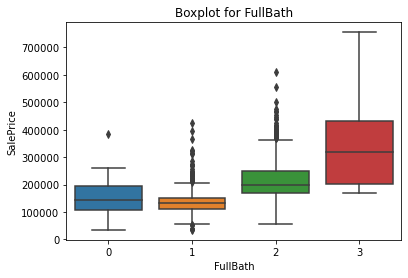

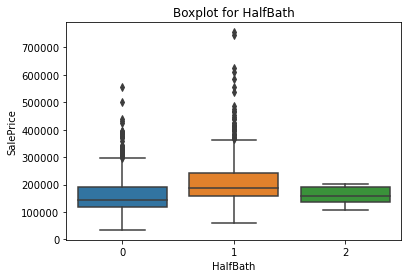

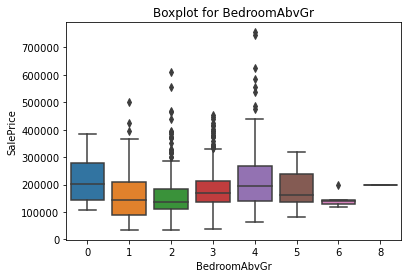

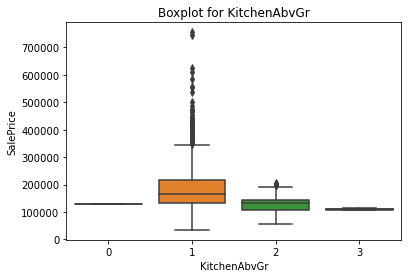

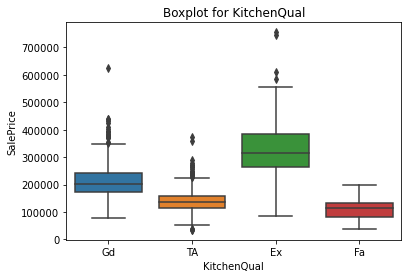

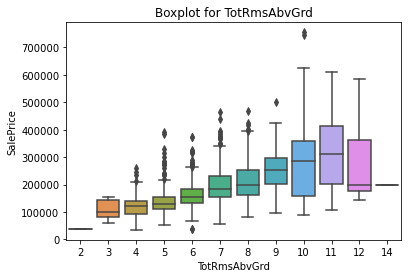

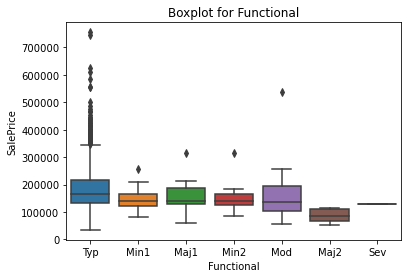

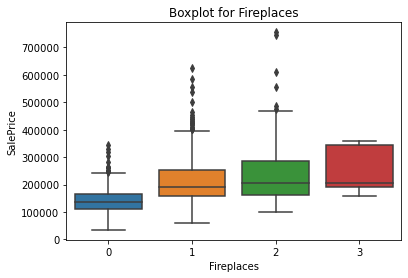

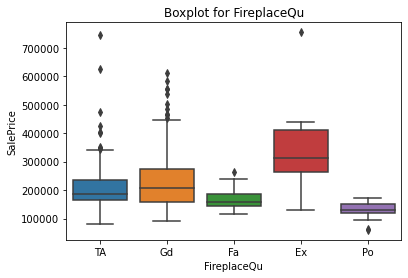

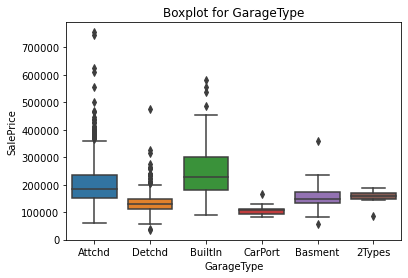

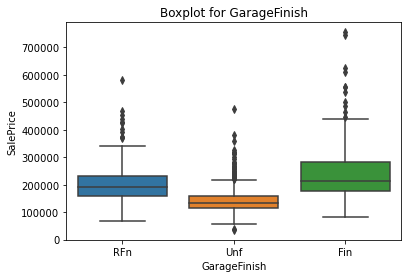

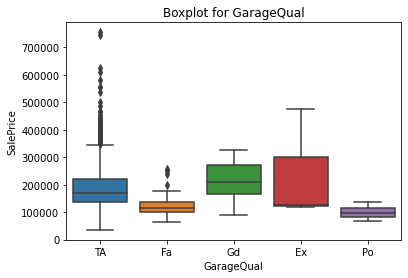

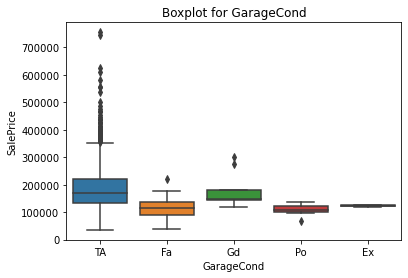

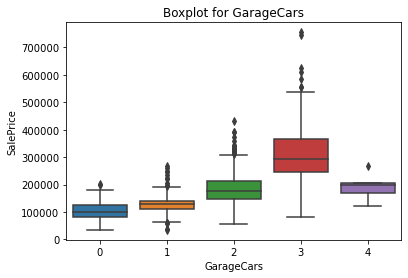

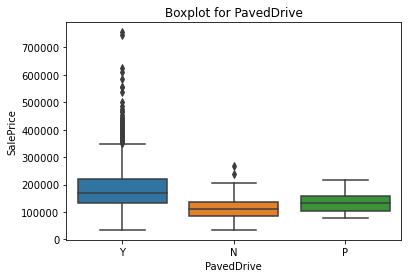

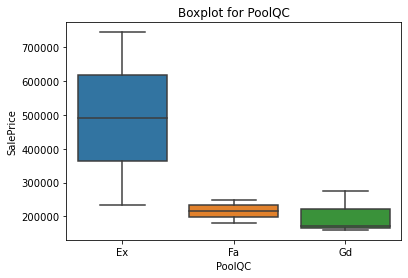

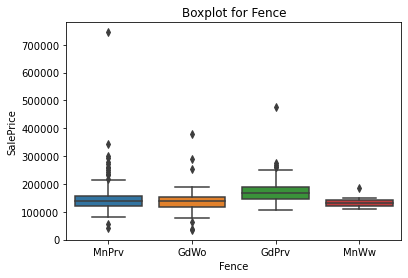

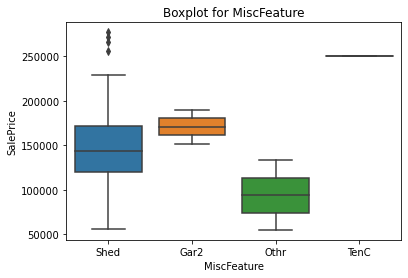

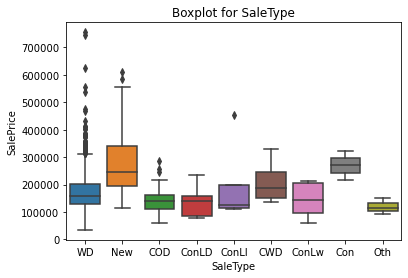

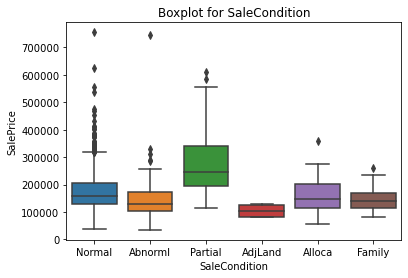

In [22]:
# Plot categorical variables using boxplot
for i in cat_cols:
    sns.boxplot(x = df[i], y = 'SalePrice', data = df)
    plt.title("Boxplot for "+i)
    plt.show()


### Insights -
1. The overall quality column is good indicator of saleprice
2. Quality of the material on the exterior is good indicator of saleprice
3. Height of basement is also good indicator of saleprice
3. If kitchen quality is excellant saleprice is more
3. Saleprice increases as total rooms above grade increases
3. As the size of garage in car capacity increases saleprice increases
3. Saleprice is more if pool quality is excellant


### Data Imputation

In [23]:
# Impute NA values with the values given in data dictionary
df[['Alley']]=df[['Alley']].fillna("No access")
df[['BsmtQual']]=df[['BsmtQual']].fillna("No Basement")
df[['BsmtCond']]=df[['BsmtCond']].fillna("No Basement")
df[['BsmtExposure']]=df[['BsmtExposure']].fillna("No Basement")
df[['BsmtFinType1']]=df[['BsmtFinType1']].fillna("No Basement")
df[['BsmtFinType2']]=df[['BsmtFinType2']].fillna("No Basement")
df[['FireplaceQu']]=df[['FireplaceQu']].fillna("No Fireplace")
df[['GarageType']]=df[['GarageType']].fillna("No Garage")
df[['GarageFinish']]=df[['GarageFinish']].fillna("No Garage")
df[['GarageQual']]=df[['GarageQual']].fillna("No Garage")
df[['GarageCond']]=df[['GarageCond']].fillna("No Garage")
df[['PoolQC']]=df[['PoolQC']].fillna("No Pool")
df[['Fence']]=df[['Fence']].fillna("No Fence")
df[['MiscFeature']]=df[['MiscFeature']].fillna("None")


In [24]:
# find columns with missing values 
for i in df.columns:
    if (100 * df[i].isnull().mean()) > 0:
        print(i)

LotFrontage
MasVnrType
MasVnrArea
Electrical
GarageYrBlt


<AxesSubplot:xlabel='LotFrontage'>

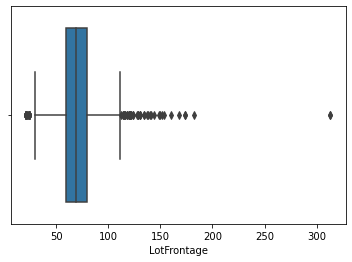

In [25]:
# check if there are outliers in LotFrontage column
sns.boxplot(df['LotFrontage'])

In [26]:
# Impute the missing values with median as there are outliers
df[['LotFrontage']]=df[['LotFrontage']].fillna(df[['LotFrontage']].median())

<AxesSubplot:xlabel='MasVnrArea'>

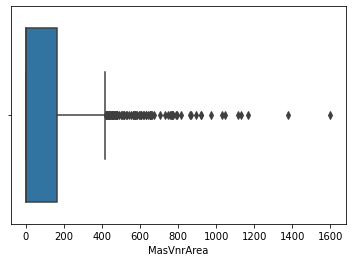

In [27]:
# check if there are outliers in MasVnrArea column
sns.boxplot(df['MasVnrArea'])

In [28]:
# Impute the missing values with median as there are outliers
df[['MasVnrArea']]=df[['MasVnrArea']].fillna(df[['MasVnrArea']].median())

<AxesSubplot:xlabel='GarageYrBlt'>

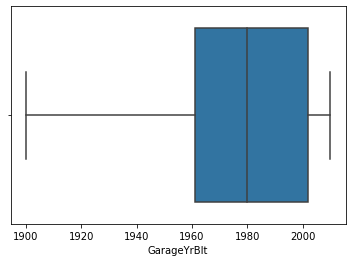

In [29]:
# check if there are outliers in GarageYrBlt column
sns.boxplot(df['GarageYrBlt'])

In [30]:
# Impute the missing values with mean as there are no outliers
df[['GarageYrBlt']]=df[['GarageYrBlt']].fillna(df[['GarageYrBlt']].mean())

In [31]:
# Impute the missing values with mode as they are categorical variables
df[['MasVnrType']]=df[['MasVnrType']].fillna(df['MasVnrType'].mode()[0])
df[['Electrical']]=df[['Electrical']].fillna(df['Electrical'].mode()[0])

In [32]:
df[['MasVnrType']].value_counts()

MasVnrType
None          872
BrkFace       445
Stone         128
BrkCmn         15
dtype: int64

In [33]:
# Check if there are missing values present
for i in df.columns:
    if (100 * df[i].isnull().mean()) > 0:
        print(i)

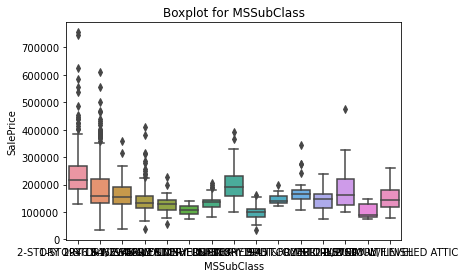

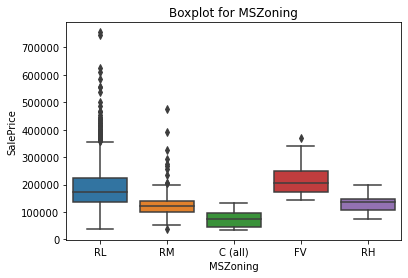

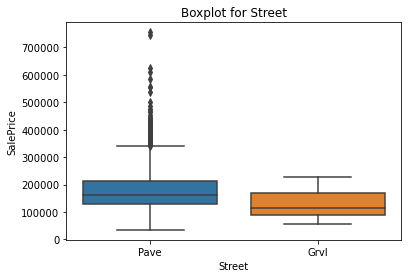

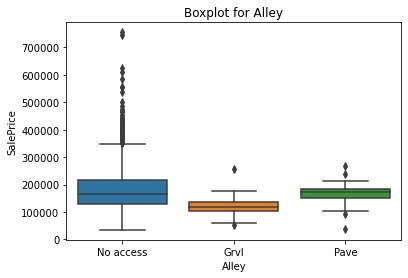

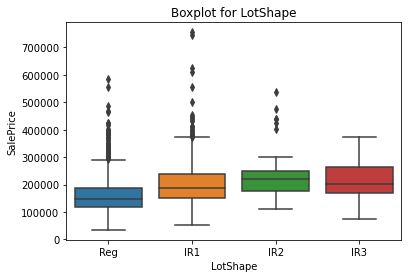

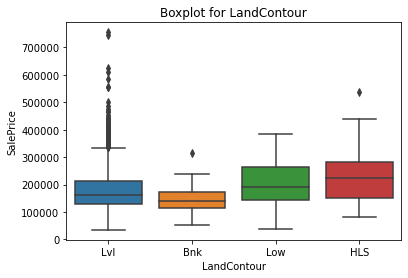

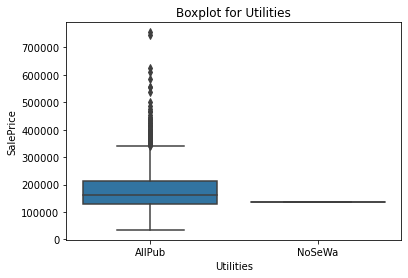

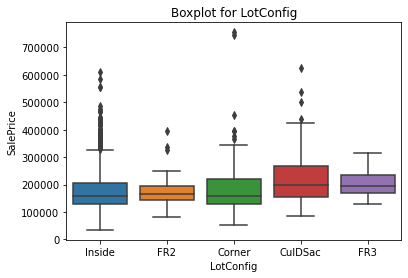

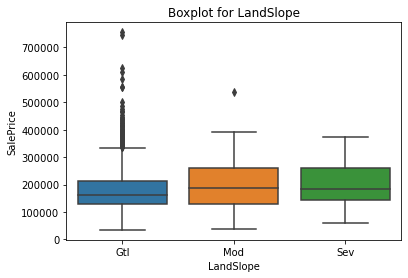

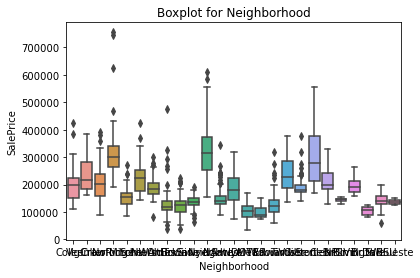

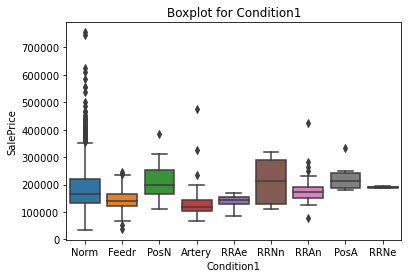

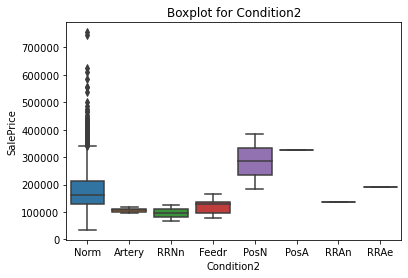

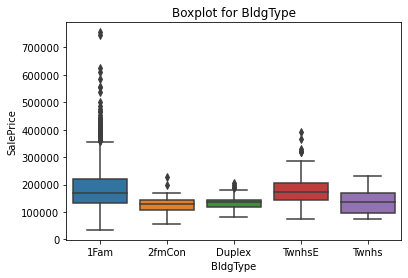

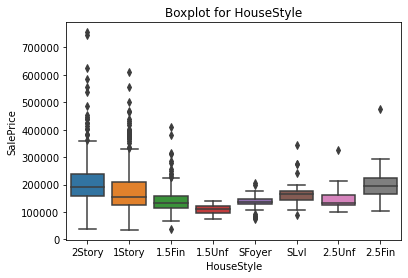

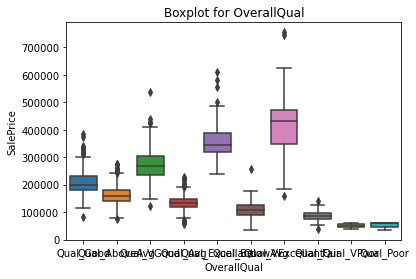

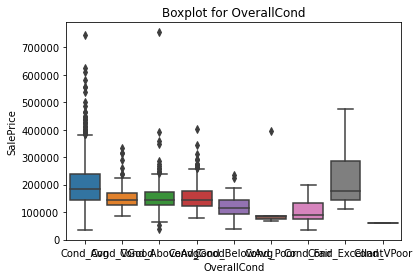

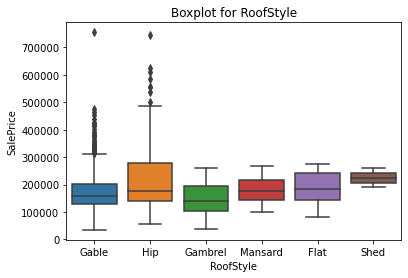

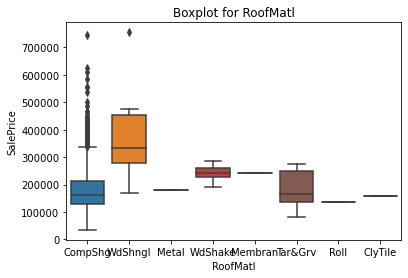

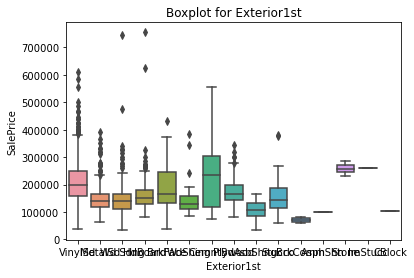

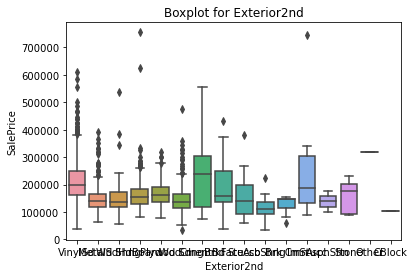

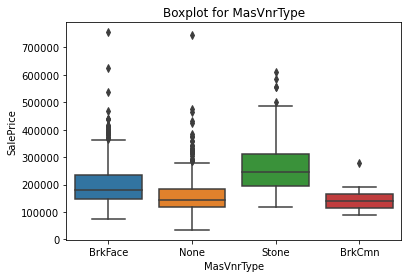

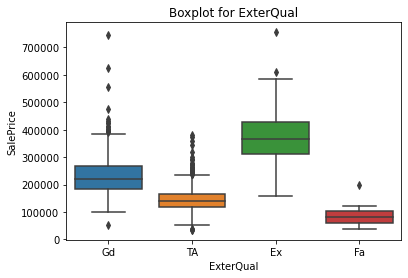

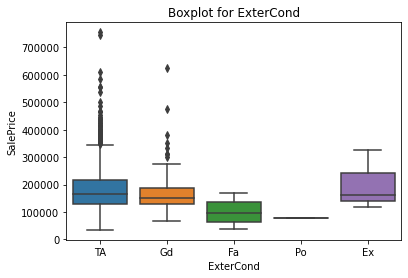

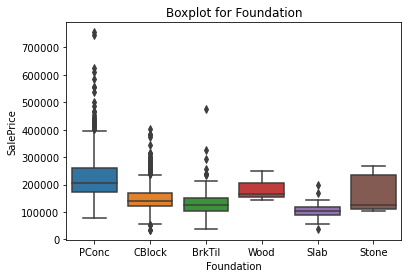

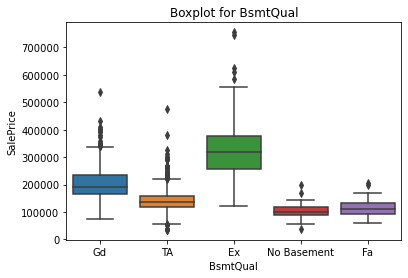

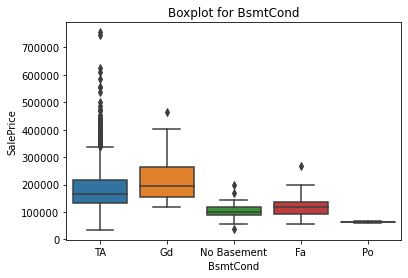

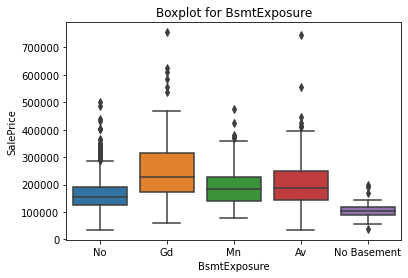

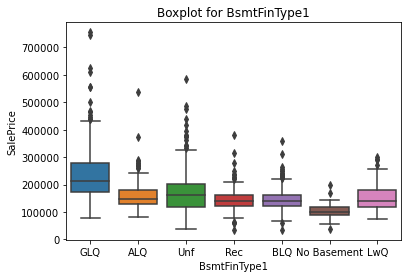

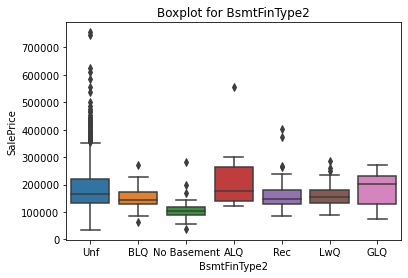

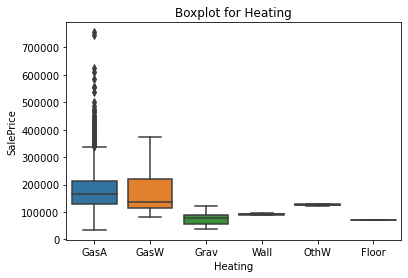

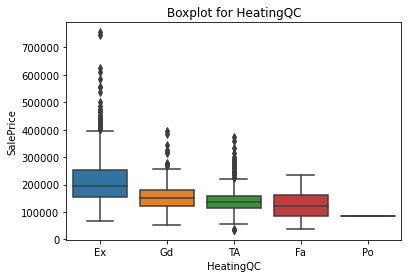

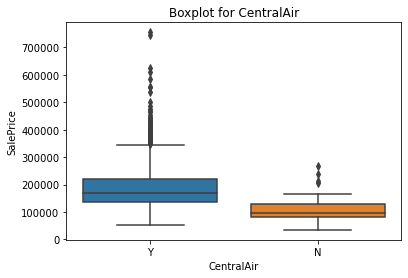

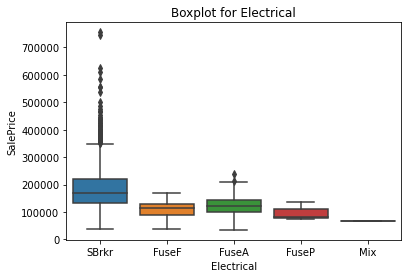

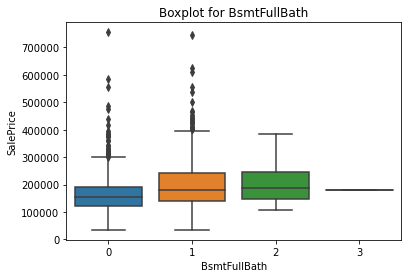

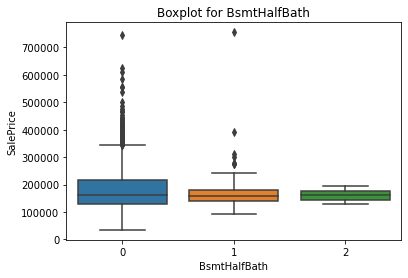

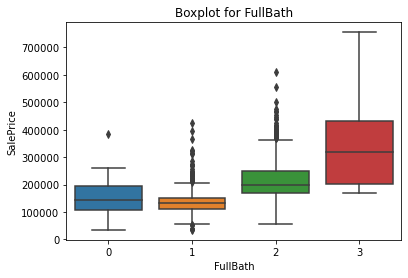

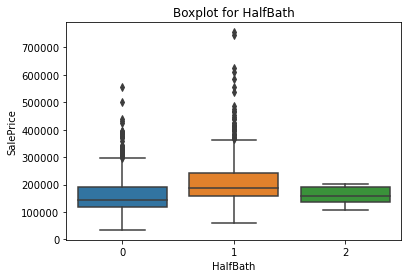

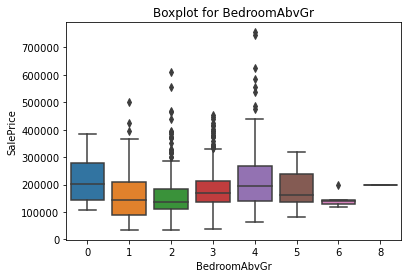

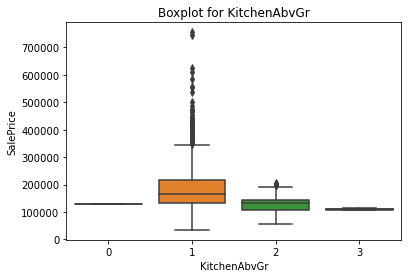

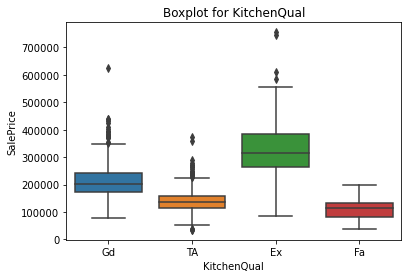

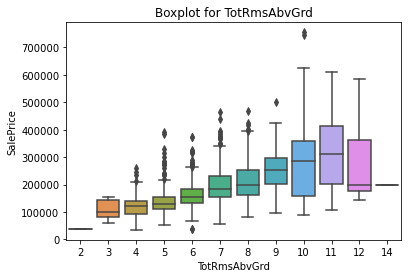

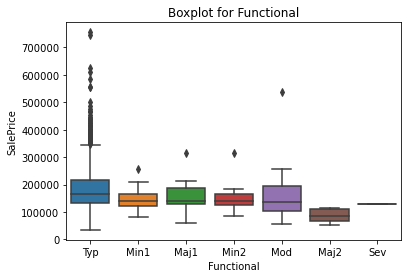

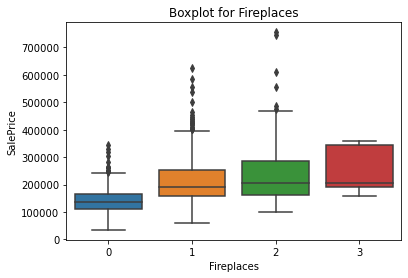

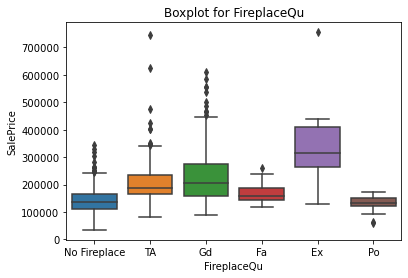

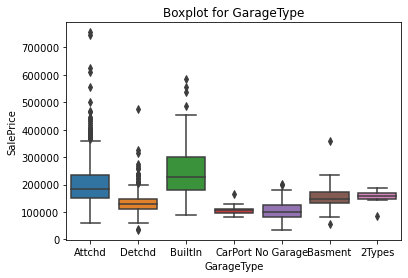

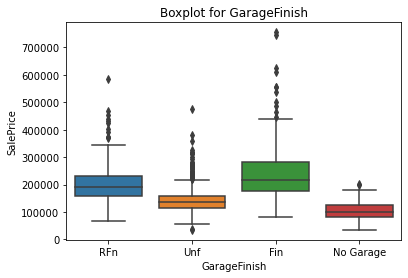

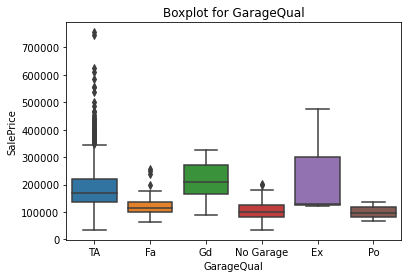

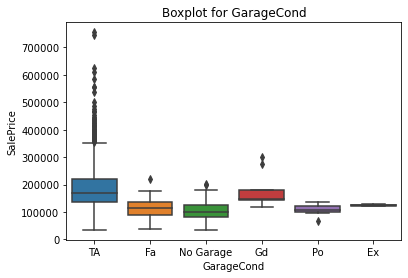

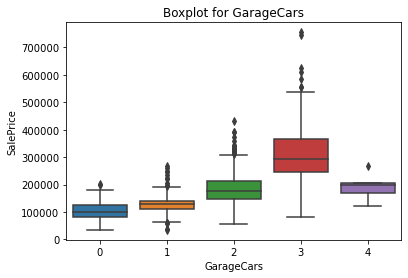

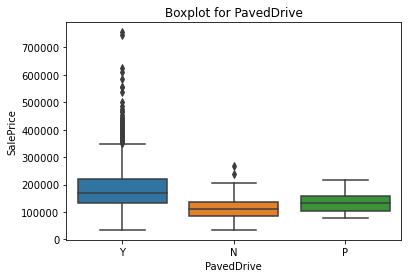

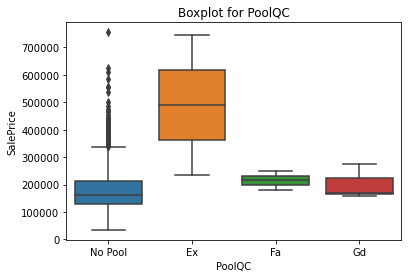

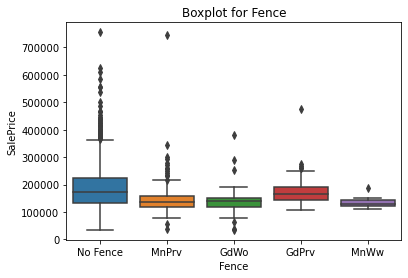

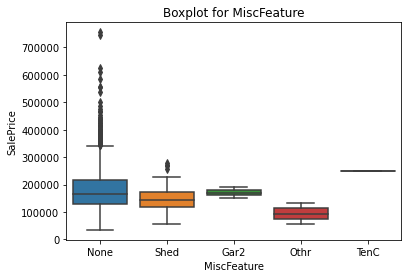

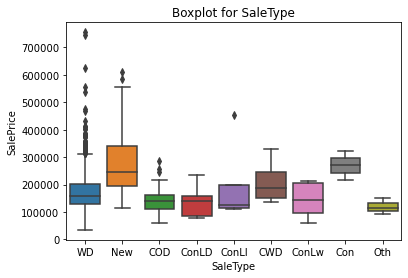

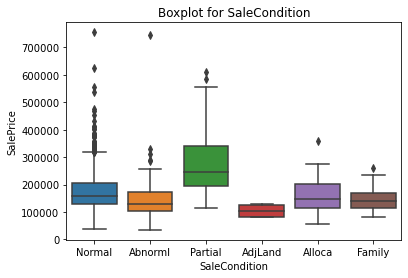

In [34]:
for i in cat_cols:
    sns.boxplot(x = df[i], y = 'SalePrice', data = df)
    plt.title("Boxplot for "+i)
    plt.show()


## Find correlation between continuous values 

In [35]:
# Drop categorical columns & Id column to get only continuous variables
df1 = df.drop(['Id'], axis = 1, inplace = False)
df1 = df1.drop(cat_cols, axis=1)
df1.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,0,61,0,0,0,0,0,2,2008,208500
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,0,42,0,0,0,0,0,9,2008,223500
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,0,35,272,0,0,0,0,2,2006,140000
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,192,84,0,0,0,0,0,12,2008,250000


In [36]:
# Find correlation between continuous variables
corr = df1.corr()

In [37]:
corr

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
LotFrontage,1.000000,0.304522,0.116685,0.083348,0.178469,0.214367,0.042463,0.124098,0.363472,0.413773,...,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771
LotArea,0.304522,1.000000,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
YearBuilt,0.116685,0.014228,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,0.391452,0.281986,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.083348,0.013788,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,0.291066,0.240379,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.178469,0.103321,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,0.214367,0.214103,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,0.042463,0.111170,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,0.124098,-0.002618,0.149040,0.181133,0.113862,-0.495251,-0.209294,1.000000,0.415360,0.317987,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479
TotalBsmtSF,0.363472,0.260833,0.391452,0.291066,0.360067,0.522396,0.104810,0.415360,1.000000,0.819530,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,0.413773,0.299475,0.281986,0.240379,0.339850,0.445863,0.097117,0.317987,0.819530,1.000000,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852


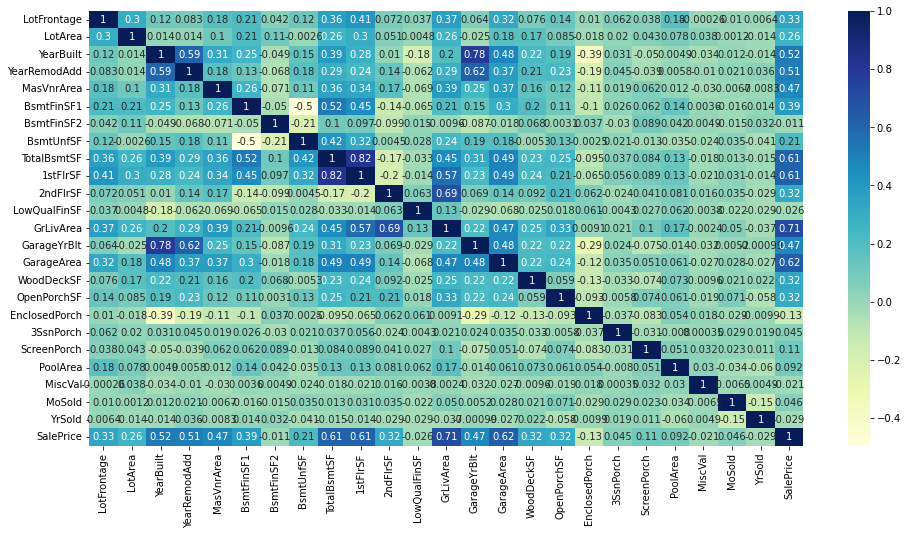

In [38]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# plot heatmap
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()


### Insights -
1. SalePrice is correlated with GrLivArea
2. GarageYrBlt & YearBuilt are more correlated
3. Correlation between independent variable  is not seen too much
4. All variables are positively correlated to SalePrice

## Data Preparation

In [39]:
# Get dummy columns 
df_dummies = pd.get_dummies(df[cat_cols], drop_first=True)
df_dummies.head()

,MSSubClass_1-1/2 STORY UNFINISHED,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER,MSSubClass_1-STORY PUD,MSSubClass_1-STORY W/FINISHED ATTIC,MSSubClass_2 FAMILY CONVERSION,MSSubClass_2-1/2 STORY,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [40]:
# Drop the original categorical variable columns as we have created dummy columns
df = df.drop(list(cat_cols), axis=1)

In [41]:
# Concat dummy variables with the original dataframe
df = pd.concat([df, df_dummies], axis=1)

In [42]:
df.shape

(1460, 318)

In [43]:
df.columns

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=318)

In [44]:
# Drop the 'Id' column as they are not useful for the analysis
df =df.drop(['Id'], axis = 1, inplace = False)
df.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,0,0,0,0,1,0,0,0,1,0


## Model Building

In [45]:
# split data into X & Y
X= df.drop(['SalePrice'], axis = 1, inplace = False)
y= df['SalePrice']

In [46]:
# check the no. of rows & columns
X.shape

(1460, 316)

In [47]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing the 316 columns
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=316)

In [48]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=10)

In [49]:
# list of alphas to tune 
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 80, 90, 100, 400, 500, 700, 800, 900, 1000, 5000 ]}

#create object          
ridge = Ridge()

# cross validation of 5 folds
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 35 candidates, totalling 175 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   80, 90, 100, 400, 500, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [50]:
# Printing the best hyperparameter alpha
model_cv.best_params_['alpha']

500

In [51]:
#Fitting Ridge model for alpha and printing coefficients which have been penalised
alpha = model_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 2.03279161e+02  3.60864849e+03  1.97225453e+03  2.41395946e+03
  3.12031788e+03  2.61701158e+03  6.59765600e+02  2.35093687e+02
  3.20015952e+03  4.98584551e+03  3.57974999e+03 -4.56111660e+00
  6.64136615e+03  1.32182946e+03  3.32715181e+03  2.27370786e+03
  1.47533591e+03 -2.89625854e+01  1.31084645e+03  2.06584901e+03
  2.67061662e+03  1.09440648e+02 -3.14282218e+00  1.92357133e+02
  1.35560403e+02 -1.01217498e+03  1.04120094e+03 -1.17320934e+03
  2.65939267e+02 -7.11178348e+02  2.68760187e+02  5.98341134e+02
  1.14838136e+03 -1.47026110e+03 -6.35420660e+02 -4.90069377e+02
 -5.81232717e+02 -3.92339312e+02  1.13366446e+03 -2.25907270e+02
  1.12129779e+03 -8.65896201e+02  1.43110031e+03  3.99104349e+02
  5.19320957e+02  1.10507205e+03 -1.54011532e+03 -6.29810572e+02
  1.23872782e+03  3.88083724e+02  1.44564407e+03 -9.86528006e+02
  2.18854697e+03 -8.12469046e+02 -1.44839414e+02 -4.15314155e+02
  1.78616387e+03 -3.78679883e+02 -9.48798621e+01 -3.36711556e+02
  6.36617871e+02 -3.62776

In [52]:
# Calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9067416936114747
0.8824778973536618
618079582547.6953
301560384855.1999
605366878.107439
688494029.3497714


In [53]:
# create lasso object
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 35 candidates, totalling 175 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   80, 90, 100, 400, 500, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [54]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_['alpha'])

400


In [55]:
#Fitting lasso model for alpha and printing coefficients which have been penalised

alpha = model_cv.best_params_['alpha']

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=400)

In [56]:
lasso.coef_

array([-0.00000000e+00,  5.23696536e+03,  7.41184431e+03,  2.39414066e+03,
        1.44310580e+03,  3.09423385e+03,  6.03113305e+02, -0.00000000e+00,
        1.05069707e+03,  1.36223376e+02,  0.00000000e+00, -1.56036736e+03,
        2.44942300e+04,  0.00000000e+00,  3.00418340e+03,  1.95940041e+03,
        1.02052256e+03, -0.00000000e+00,  1.27406561e+03,  2.42148270e+03,
        6.73581674e+03, -0.00000000e+00, -1.12354593e+02,  6.11072922e+01,
        1.79064522e+02, -0.00000000e+00,  2.67246352e+03, -1.93251579e+02,
        0.00000000e+00, -0.00000000e+00, -1.04718412e+01,  0.00000000e+00,
        0.00000000e+00, -1.43171707e+03, -0.00000000e+00, -0.00000000e+00,
       -2.63712812e+01,  0.00000000e+00,  7.21791428e+02, -0.00000000e+00,
        3.29417037e+02, -0.00000000e+00,  3.36677220e+03,  0.00000000e+00,
        1.60188020e+01,  8.28929518e+02, -7.08744951e+02, -0.00000000e+00,
        7.81425358e+02,  0.00000000e+00,  2.70202799e+03, -7.96425380e+02,
        2.53107377e+03, -

In [57]:
# Calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9289319897741015
0.8446131653456066
471010977938.1902
398720858499.46466
461323190.92868775
910321594.7476362


## Residual Analysis

In [58]:
# Find residual which is difference between actual & predicted values
residual = y_test - y_pred_test

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

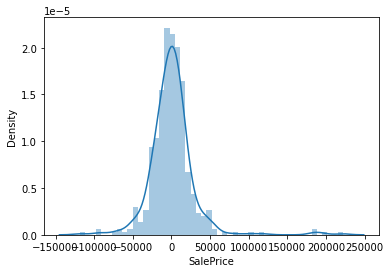

In [59]:
# Plot distplot, the residuals are normally distributed with mean 0
sns.distplot(residual)

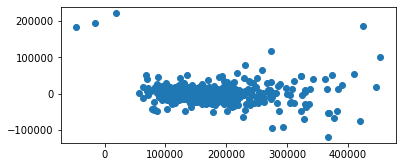

In [60]:
# Plot graph between residual & predicted values
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred_test, residual)

Text(0, 0.5, 'y_pred')

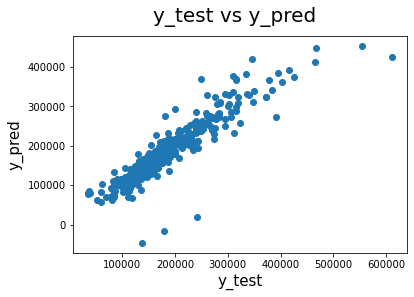

In [61]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_test)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 15)                          # X-label
plt.ylabel('y_pred', fontsize = 15)  


In [62]:
# Creating a table which contain all the metrics

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([rg_metric, ls_metric], axis = 1)

final_metric

,Ridge Regression,Lasso Regression
0,9.067417e-01,9.289320e-01
1,8.824779e-01,8.446132e-01
2,6.180796e+11,4.710110e+11
3,3.015604e+11,3.987209e+11
4,2.460420e+04,2.147844e+04
5,2.623917e+04,3.017154e+04


In [63]:
betas = pd.DataFrame(index=X.columns)

In [64]:
betas.rows = X.columns

In [65]:
# store the coefficients in dataframe
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [66]:
pd.set_option('display.max_rows', None)
betas.sort_values(by=['Ridge'], ascending=False)


,Ridge,Lasso
OverallQual_Qual_Excellant,7.426669e+03,11817.682790
GrLivArea,6.641366e+03,24494.230012
FullBath_3,6.062182e+03,5772.726954
OverallQual_Qual_VExcellant,5.387341e+03,9486.045511
GarageCars_3,5.121760e+03,5363.852967
1stFlrSF,4.985846e+03,136.223376
Neighborhood_NridgHt,4.722341e+03,5913.991786
Neighborhood_NoRidge,4.594244e+03,5323.190654
TotRmsAbvGrd_10,4.338448e+03,3312.450472
RoofMatl_WdShngl,4.299626e+03,15741.565096


In [67]:
# get the most important predictor variables found by ridge model
betas['Ridge'].sort_values(ascending=False)

OverallQual_Qual_Excellant             7.426669e+03
GrLivArea                              6.641366e+03
FullBath_3                             6.062182e+03
OverallQual_Qual_VExcellant            5.387341e+03
GarageCars_3                           5.121760e+03
1stFlrSF                               4.985846e+03
Neighborhood_NridgHt                   4.722341e+03
Neighborhood_NoRidge                   4.594244e+03
TotRmsAbvGrd_10                        4.338448e+03
RoofMatl_WdShngl                       4.299626e+03
OverallQual_Qual_VGood                 3.632849e+03
Neighborhood_StoneBr                   3.619259e+03
LotArea                                3.608648e+03
2ndFlrSF                               3.579750e+03
GarageArea                             3.327152e+03
Fireplaces_2                           3.263064e+03
TotalBsmtSF                            3.200160e+03
MasVnrArea                             3.120318e+03
BsmtExposure_Gd                        2.707835e+03
PoolArea    

In [68]:
# get the most important predictor variables found by lasso model
betas['Lasso'].sort_values(ascending=False)

RoofMatl_CompShg                       24949.117742
GrLivArea                              24494.230012
RoofMatl_WdShngl                       15741.565096
RoofMatl_Tar&Grv                       15482.952812
OverallQual_Qual_Excellant             11817.682790
RoofMatl_WdShake                       10910.949057
OverallQual_Qual_VExcellant             9486.045511
YearBuilt                               7411.844310
OverallQual_Qual_VGood                  7188.422577
PoolArea                                6735.816738
Neighborhood_NridgHt                    5913.991786
FullBath_3                              5772.726954
GarageCars_3                            5363.852967
Neighborhood_NoRidge                    5323.190654
SaleType_New                            5287.908588
LotArea                                 5236.965364
Neighborhood_StoneBr                    4624.699538
Neighborhood_Crawfor                    4518.290395
Condition1_Norm                         3929.728943
Street_Pave 

## Question 1

In [69]:
# alpha is doubled for ridge regression
alpha = 2 * 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 7.47245011e+02  2.85808754e+03  1.68355864e+03  2.38049062e+03
  3.06816155e+03  2.58061477e+03  4.45859965e+02  4.36882007e+02
  3.28690563e+03  4.44955342e+03  3.03985909e+03  9.27430626e+01
  5.80732845e+03  1.37983784e+03  3.31403973e+03  2.22896027e+03
  1.47432635e+03  3.49289742e+00  9.88941640e+02  1.70129078e+03
  1.69130306e+03  9.90391312e+01  8.02955331e+01  1.30492042e+02
  8.80168641e+01 -9.85347287e+02  6.41880183e+02 -8.50847931e+02
  2.50004436e+02 -5.65777128e+02  3.30440917e+02  5.63516109e+02
  1.30284426e+03 -1.27246874e+03 -6.41418987e+02 -4.52153517e+02
 -4.48235924e+02 -3.44669191e+02  8.54492081e+02 -2.33200743e+02
  1.04233661e+03 -1.05690543e+03  8.34179156e+02  3.51914863e+02
  2.97780920e+02  1.08298349e+03 -1.25261982e+03 -8.86647679e+02
  1.09728688e+03  4.05230697e+02  7.30667435e+02 -7.55207848e+02
  1.82804736e+03 -6.09442485e+02 -1.29597846e+02 -5.03818968e+02
  1.33626297e+03 -1.36960383e+02 -6.36019291e+01 -4.21813209e+02
  4.43144532e+02 -7.72588

In [70]:
# Calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8861321230318201
0.8753551166314875
754671756195.9135
319837359547.2027
739149614.2957036
730222282.071239


In [71]:
#Fitting lasso model for new alpha and printing coefficients which have been penalised

alpha = 2 * 400

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=800)

In [72]:
# Calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9107413335140899
0.8853783143785415
591571533483.9426
294117947606.64746
579404048.4661534
671502163.4854965


In [73]:
# Creating a table which contain all the metrics

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([rg_metric, ls_metric], axis = 1)

final_metric

,Ridge Regression,Lasso Regression
0,8.861321e-01,9.107413e-01
1,8.753551e-01,8.853783e-01
2,7.546718e+11,5.915715e+11
3,3.198374e+11,2.941179e+11
4,2.718731e+04,2.407081e+04
5,2.702263e+04,2.591336e+04


In [74]:
betas = pd.DataFrame(index=X.columns)

In [75]:
betas.rows = X.columns

In [76]:
# store coefficients in dataframe
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [77]:
pd.set_option('display.max_rows', None)
betas.sort_values(by=['Ridge'], ascending=False)


,Ridge,Lasso
OverallQual_Qual_Excellant,6.103961e+03,12619.059915
GrLivArea,5.807328e+03,24022.189615
FullBath_3,5.154571e+03,5972.015117
GarageCars_3,4.829850e+03,6556.089571
1stFlrSF,4.449553e+03,450.168205
OverallQual_Qual_VExcellant,4.444320e+03,8799.396568
Neighborhood_NridgHt,3.941619e+03,6219.349791
TotRmsAbvGrd_10,3.858516e+03,3304.322344
Neighborhood_NoRidge,3.830417e+03,4905.521515
RoofMatl_WdShngl,3.591170e+03,3819.138679


In [78]:
# get the most important predictor variables found by ridge model
betas['Ridge'].sort_values(ascending=False)

OverallQual_Qual_Excellant             6.103961e+03
GrLivArea                              5.807328e+03
FullBath_3                             5.154571e+03
GarageCars_3                           4.829850e+03
1stFlrSF                               4.449553e+03
OverallQual_Qual_VExcellant            4.444320e+03
Neighborhood_NridgHt                   3.941619e+03
TotRmsAbvGrd_10                        3.858516e+03
Neighborhood_NoRidge                   3.830417e+03
RoofMatl_WdShngl                       3.591170e+03
GarageArea                             3.314040e+03
TotalBsmtSF                            3.286906e+03
MasVnrArea                             3.068162e+03
2ndFlrSF                               3.039859e+03
Fireplaces_2                           2.975510e+03
OverallQual_Qual_VGood                 2.963755e+03
Neighborhood_StoneBr                   2.958694e+03
LotArea                                2.858088e+03
BsmtFinSF1                             2.580615e+03
BsmtExposure

In [79]:
# get the most important predictor variables found by lasso model
betas['Lasso'].sort_values(ascending=False)

GrLivArea                              24022.189615
OverallQual_Qual_Excellant             12619.059915
OverallQual_Qual_VExcellant             8799.396568
OverallQual_Qual_VGood                  7061.642467
GarageCars_3                            6556.089571
PoolArea                                6270.345482
Neighborhood_NridgHt                    6219.349791
FullBath_3                              5972.015117
YearBuilt                               5948.168111
Neighborhood_NoRidge                    4905.521515
Neighborhood_StoneBr                    4517.230996
Neighborhood_Crawfor                    4323.840322
LotArea                                 4252.443472
SaleType_New                            4075.277205
RoofMatl_WdShngl                        3819.138679
TotRmsAbvGrd_10                         3304.322344
YearRemodAdd                            3172.558676
BsmtExposure_Gd                         3117.993151
Condition1_Norm                         2970.955214
GarageArea  

## Question 3

In [80]:
# Drop first 5 predictor variables & train lasso model again
X_train = X_train.drop(['RoofMatl_CompShg', 'GrLivArea', 'RoofMatl_WdShngl', 'RoofMatl_Tar&Grv', 'OverallQual_Qual_Excellant'],axis=1,inplace=False)

In [81]:
# confirm the 5 columns are deleted
X_train.shape

(1021, 311)

In [82]:
# Drop from test dataset as well
X_test = X_test.drop(['RoofMatl_CompShg', 'GrLivArea', 'RoofMatl_WdShngl', 'RoofMatl_Tar&Grv', 'OverallQual_Qual_Excellant'],axis=1,inplace=False)

In [83]:
# confirm the 5 columns are deleted
X_test.shape

(438, 311)

In [84]:
#Fitting lasso model for alpha = 400 and printing coefficients which have been penalised
alpha = 400

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=400)

In [85]:
# Calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9143990169009406
0.872993220513452
567329838471.6205
325897958245.6975
555660958.3463472
744059265.4011359


In [86]:
betas = pd.DataFrame(index=X_train.columns)

In [87]:
betas.rows = X_train.columns

In [88]:
# store coefficient in dataframe
betas['Lasso'] = lasso.coef_

In [89]:
# get the most important predictor variables found by lasso model
betas['Lasso'].sort_values(ascending=False)

1stFlrSF                               19378.957785
2ndFlrSF                               17444.206843
PoolArea                                8698.163788
GarageCars_3                            8501.154006
Neighborhood_NridgHt                    7557.355408
LotArea                                 7040.370958
FullBath_3                              6889.596774
YearBuilt                               6459.381700
Neighborhood_NoRidge                    6134.037189
Neighborhood_StoneBr                    5451.998338
Street_Pave                             4539.685137
OverallQual_Qual_VExcellant             4276.015135
BsmtExposure_Gd                         4116.892594
SaleType_New                            3993.845834
TotRmsAbvGrd_10                         3932.738111
WoodDeckSF                              3571.590055
Neighborhood_Crawfor                    3487.087422
Condition1_Norm                         3160.083823
ScreenPorch                             2996.645672
BsmtCond_TA 